In [1]:
import numpy as np
from torchvision import datasets
#data_path = 'Desktop/' #save directory
#mnist = datasets.MNIST(data_path, train=True, download=True)
from torchvision import transforms
import torch
import torch.nn as nn
from torch import optim
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

C:\Users\jack 2\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])
mnist_train = datasets.MNIST('DataPath', download=True, train=True, transform=transform)
mnist_val = datasets.MNIST('DataPath', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)


Extracting DataPath\MNIST\raw\train-images-idx3-ubyte.gz to DataPath\MNIST\raw




Extracting DataPath\MNIST\raw\train-labels-idx1-ubyte.gz to DataPath\MNIST\raw




Extracting DataPath\MNIST\raw\t10k-images-idx3-ubyte.gz to DataPath\MNIST\raw




Extracting DataPath\MNIST\raw\t10k-labels-idx1-ubyte.gz to DataPath\MNIST\raw



In [3]:
check_shape = iter(trainloader)
images, labels = check_shape.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


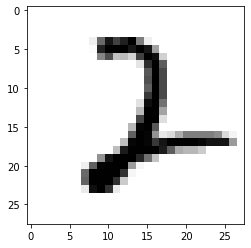

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

In [5]:
examples = enumerate(mnist_val)
batch_idx, (example_data, example_targets) = next(examples)


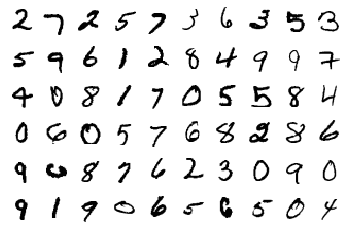

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [15]:
input_size = 784 # 784 because the image size is 28*28
hidden_sizes = [128,64,32]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], hidden_sizes[2],hidden_sizes[2]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[2], output_size),
                     nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.0001)
#optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      #momentum=momentum)
loss_fn = nn.NLLLoss()
#time0=time()
n_epochs = 15
for epoch in range(n_epochs):
    for imgs, labels in trainloader:
        optimizer.zero_grad()

        batch_size = imgs.shape[0]
        output = model(imgs.view(batch_size, -1))

        loss = loss_fn(output, labels)

        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.001180
Epoch: 1, Loss: 0.000092
Epoch: 2, Loss: 0.001094
Epoch: 3, Loss: 0.002041
Epoch: 4, Loss: 0.000556
Epoch: 5, Loss: 0.000012
Epoch: 6, Loss: 0.000278
Epoch: 7, Loss: 0.000353
Epoch: 8, Loss: 0.000076
Epoch: 9, Loss: 0.000012
Epoch: 10, Loss: 0.000038
Epoch: 11, Loss: 0.000001
Epoch: 12, Loss: 0.000025
Epoch: 13, Loss: 0.000013
Epoch: 14, Loss: 0.000062


In [19]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9828


In [20]:
torch.save(model, './three_hidden_layer_model.pt')